# Optimizing Train Services: Predictive Modeling and Capacity Planning Amidst COVID-19 Dynamics

# Setup environment and install requirements

This code snippet imports the essential libraries for data manipulation and visualization.

In [99]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

# Data loader

This code snippet loads the dataset into a pandas DataFrames. It reads the dataset files from the specified file paths using the read_csv function.
*   df contains ridership information for each station.

In [100]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('data/Ridership.csv')
df.sample(10)

,Year,Month,Day,Week Number,Corridor,Workday,Station,Period,Ridership,N_trains,Covid19
39088,2021,June,18,24,Corridor_7,y,Station_24,PM Peak,34,2,1
2095,2019,February,7,6,Corridor_3,y,Station_4,PM Peak,1221,5,0
34329,2021,February,9,6,Corridor_4,y,Station_3,Evening,43,1,1
9176,2019,July,8,28,Corridor_2,y,Station_3,PM Peak,10294,12,0
20010,2020,February,10,7,Corridor_4,y,Station_3,Midday,682,6,1
5678,2019,April,23,17,Corridor_2,y,Station_3,PM Peak,10199,12,0
43664,2021,October,4,40,Corridor_4,y,Station_9,AM Peak,490,4,1
53275,2022,May,2,18,Corridor_2,y,Station_3,PM Peak,2590,9,0
4711,2019,April,2,14,Corridor_1,y,Station_1,Midday,931,1,0
37267,2021,April,30,17,Corridor_4,y,Station_11,Evening,22,1,1


In [101]:
df[(df['Corridor'] == 'Corridor_3') & (df['Month'] == 'July') & (df['Day'] == 29) & (df['Year'] == 2019) & (df['Period'] == 'AM Peak')]

,Year,Month,Day,Week Number,Corridor,Workday,Station,Period,Ridership,N_trains,Covid19
10194,2019,July,29,31,Corridor_3,y,Station_4,AM Peak,3429,4,0
10199,2019,July,29,31,Corridor_3,y,Station_12,AM Peak,1322,2,0
10200,2019,July,29,31,Corridor_3,y,Station_17,AM Peak,3974,4,0
10202,2019,July,29,31,Corridor_3,y,Station_23,AM Peak,1064,1,0
10203,2019,July,29,31,Corridor_3,y,Station_13,AM Peak,2027,2,0
10206,2019,July,29,31,Corridor_3,y,Station_3,AM Peak,1170,11,0
10210,2019,July,29,31,Corridor_3,y,Station_15,AM Peak,699,1,0


# Data Exploration

In [102]:
def my_plot(x,y, x_label, y_label, title):
  plt.figure(figsize=(15, 6))
  plt.plot(x,y)
  plt.xlabel(x_label)
  plt.ylabel(y_label)
  plt.title(title)
  plt.show()

**The chart below shows that during the years affected by COVID-19, the number of passengers dropped significantly.**


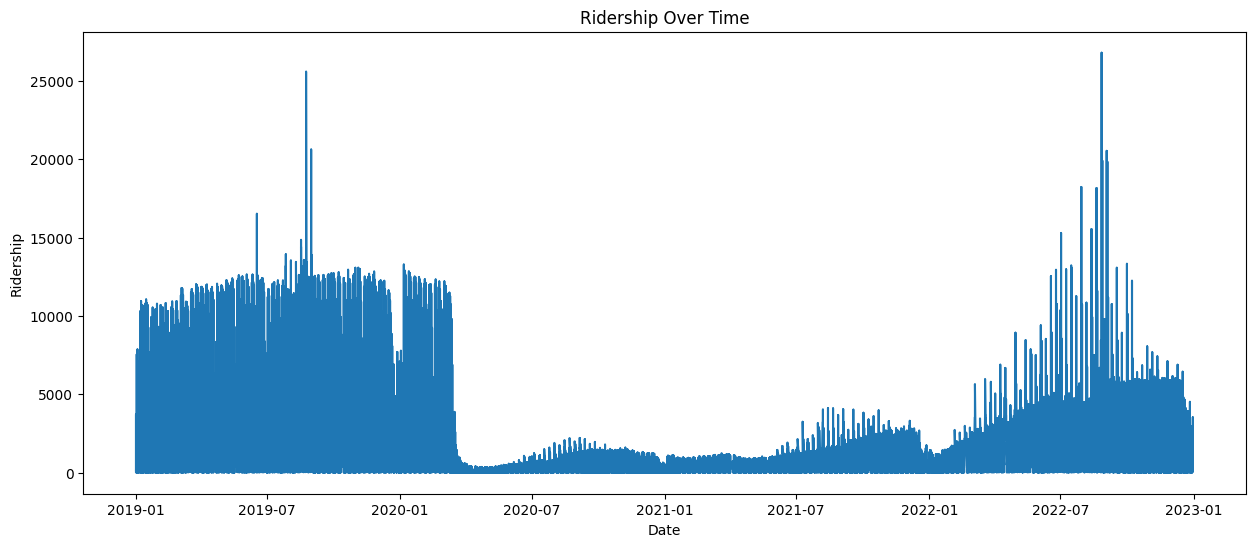

In [103]:
# plot of 'Ridership' over time (day)
df_new = pd.to_datetime(df['Year'].astype(str) + '-' + df['Day'].astype(str) + '-' + df['Month'].astype(str))
my_plot(df_new.iloc[0:], df.iloc[0:, df.columns.get_loc('Ridership')], 'Date','Ridership','Ridership Over Time')

**The chart below indicates that the passenger volume remains nearly consistent across all months, with only a slight decrease at the beginning and end of the year.**


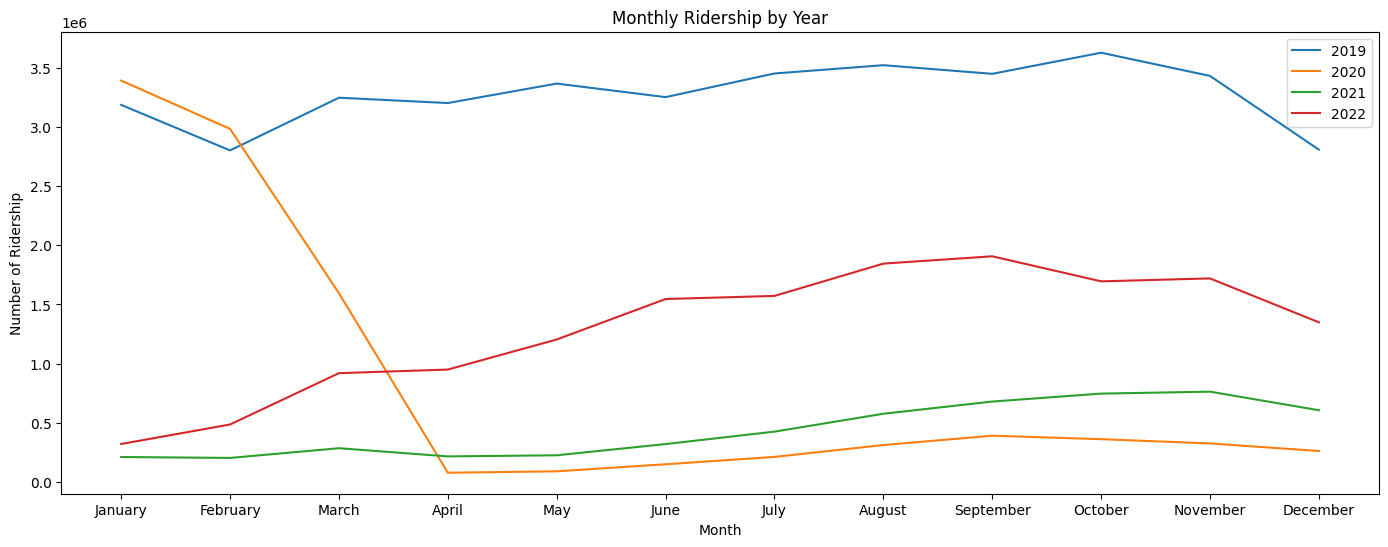

In [104]:
# Lets plot the data based on month of the year for different years
grouped_dataset = df.groupby(['Year', 'Month']).sum().reset_index()
years = grouped_dataset['Year'].unique()

month_mapping = {'January': 1, 'February':2, 'March': 3,
                 'April': 4, 'May': 5, 'June': 6, 'July': 7,
                 'August': 8, 'September': 9, 'October': 10, 
                 'November': 11, 'December': 12
                }


# Map the month names to numbers using the mapping dictionary so that we could sort the months
grouped_dataset['Month_Number'] = grouped_dataset['Month'].map(month_mapping)
grouped_dataset = grouped_dataset.sort_values(by=['Year', 'Month_Number'])

plt.figure(figsize=(17, 6))
for year in years:
    year_data = grouped_dataset[grouped_dataset['Year'] == year]
    plt.plot(year_data['Month'], year_data['Ridership'], label=str(year))

plt.title('Monthly Ridership by Year')
plt.xlabel('Month')
plt.ylabel('Number of Ridership')
plt.legend();

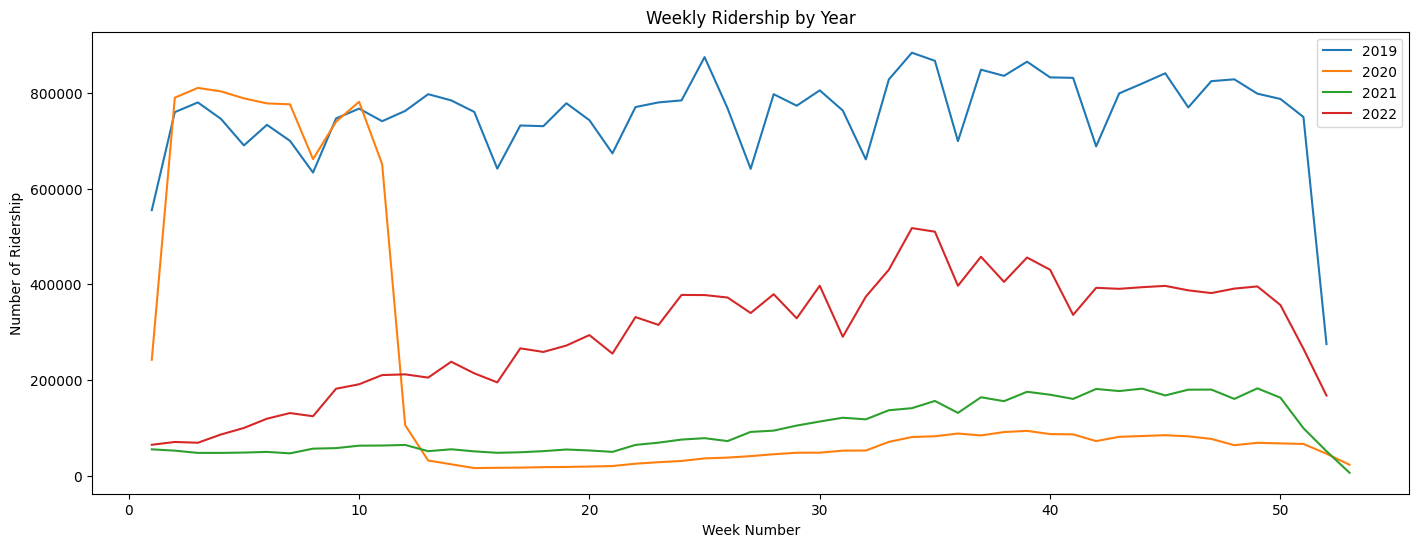

In [105]:
# Lets plot the data based on week of the year for different years
grouped_weekly = df.groupby(['Year', 'Week Number']).sum().reset_index()
years = grouped_weekly['Year'].unique()

plt.figure(figsize=(17, 6))
for year in years:
    year_data = grouped_weekly[grouped_weekly['Year'] == year]
    plt.plot(year_data['Week Number'], year_data['Ridership'], label=str(year))

plt.title('Weekly Ridership by Year')
plt.xlabel('Week Number')
plt.ylabel('Number of Ridership')
plt.legend();

**The chart below shows that there can be significant differences between various stations.**


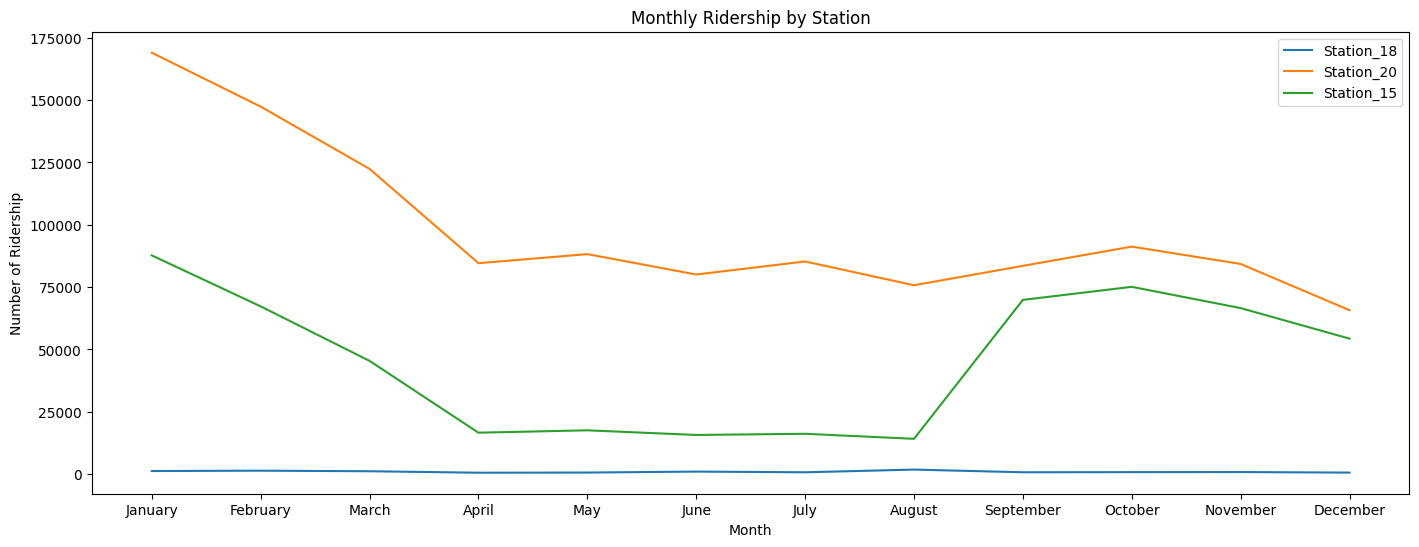

In [106]:
# Lets plot the Monthly Ridership by Station

# Group by Station and Month and calculate the sum of ridership
grouped_stations = df.groupby(['Station', 'Month']).sum().reset_index()
grouped_stations['Month_Number'] = grouped_stations['Month'].map(month_mapping)

# Create a list of unique years for plotting
years = grouped_stations['Year'].unique()
random_stations = grouped_stations['Station'].sample(n=3, random_state=23).unique()

# Sort the DataFrame by Station and Month_Number
grouped_stations = grouped_stations.sort_values(by=['Station', 'Month_Number'])

plt.figure(figsize=(17, 6))

# Plot each station with different symbology
for station in random_stations:
    station_data = grouped_stations[grouped_stations['Station'] == station]
    plt.plot(station_data['Month'], station_data['Ridership'], label=str(station))

plt.title('Monthly Ridership by Station')
plt.xlabel('Month')
plt.ylabel('Number of Ridership')
plt.legend();

**The three charts below suggest that metro usage peaks twice during the day: once in the morning rush hour and again in the evening rush hour.**


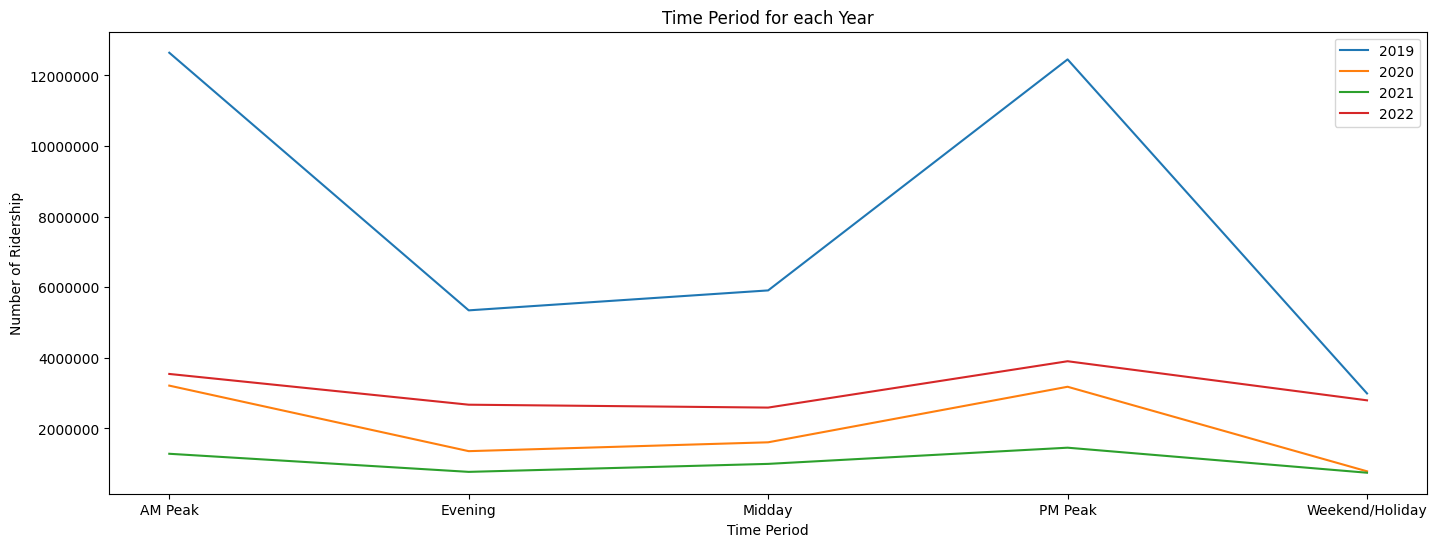

In [107]:
# Lets plot the Ridership per Time Period for each Year

# Group by Year and Time Period and calculate the sum of ridership
grouped_year_time = df.groupby(['Year', 'Period']).sum().reset_index()

# Define the order of the Time Period categories
time_period_order = ['AM Peak', 'Midday', 'PM Peak', 'Evening', 'Weekend/Holiday']

# Convert 'Time Period' column to a categorical data type with the desired order
grouped_year_time['Period'] = pd.Categorical(grouped_year_time['Period'], categories=time_period_order, ordered=True)

# Create a list of years for plotting
years = grouped_year_time['Year'].unique()

plt.figure(figsize=(17, 6))

# Plot each year with different symbology
for year in years:
    year_data = grouped_year_time[grouped_year_time['Year'] == year]
    plt.plot(year_data['Period'], year_data['Ridership'], label=str(year))

plt.ticklabel_format(style='plain', axis='y')
plt.title('Time Period for each Year')
plt.xlabel('Time Period')
plt.ylabel('Number of Ridership')
plt.legend();

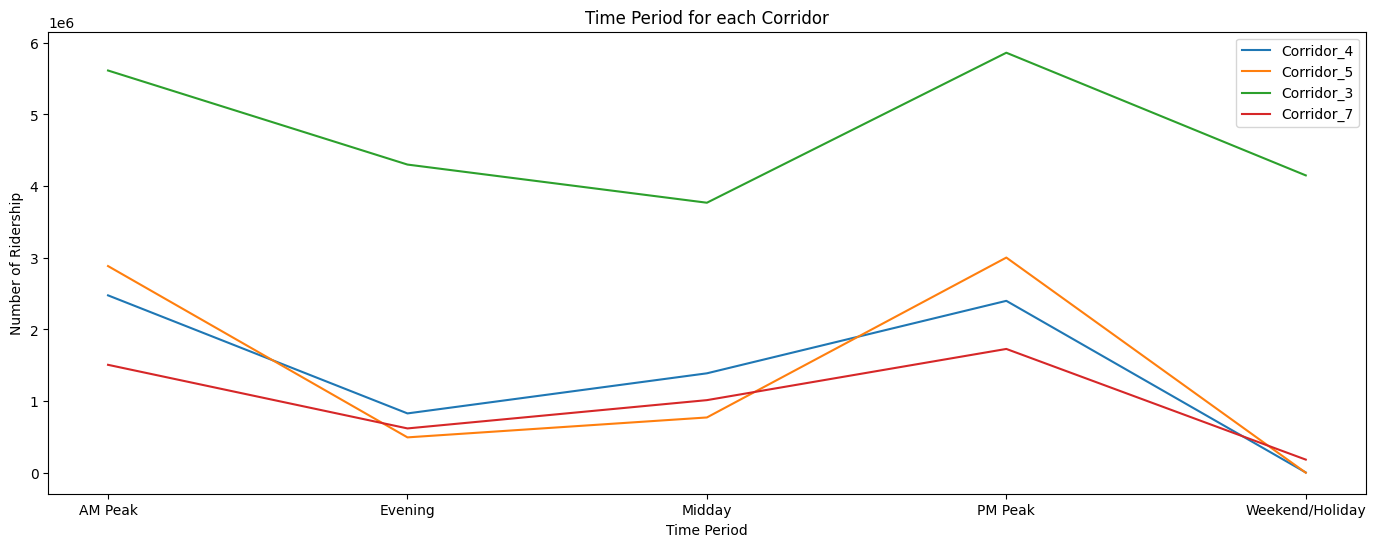

In [108]:
# Lets plot Ridership per Time Period for each Corridor

# Group by Corridor and Time Period and calculate the sum of ridership
grouped_corridor_time = df.groupby(['Corridor', 'Period']).sum().reset_index()

# Define the order of the Time Period categories
time_period_order = ['AM Peak', 'Midday', 'PM Peak', 'Evening', 'Weekend/Holiday']

# Convert 'Time Period' column to a categorical data type with the desired order
grouped_corridor_time['Period'] = pd.Categorical(grouped_corridor_time['Period'], categories=time_period_order, ordered=True)

# Create a list of year for plotting
corridors = grouped_corridor_time['Corridor'].sample(n=7, random_state=4).unique()

plt.figure(figsize=(17, 6))

# Plot each year with different symbology
for corridor in corridors:
    corridor_data = grouped_corridor_time[grouped_corridor_time['Corridor'] == corridor]
    plt.plot(corridor_data['Period'], corridor_data['Ridership'], label=str(corridor))
plt.title('Time Period for each Corridor')
plt.xlabel('Time Period')
plt.ylabel('Number of Ridership')
plt.legend();

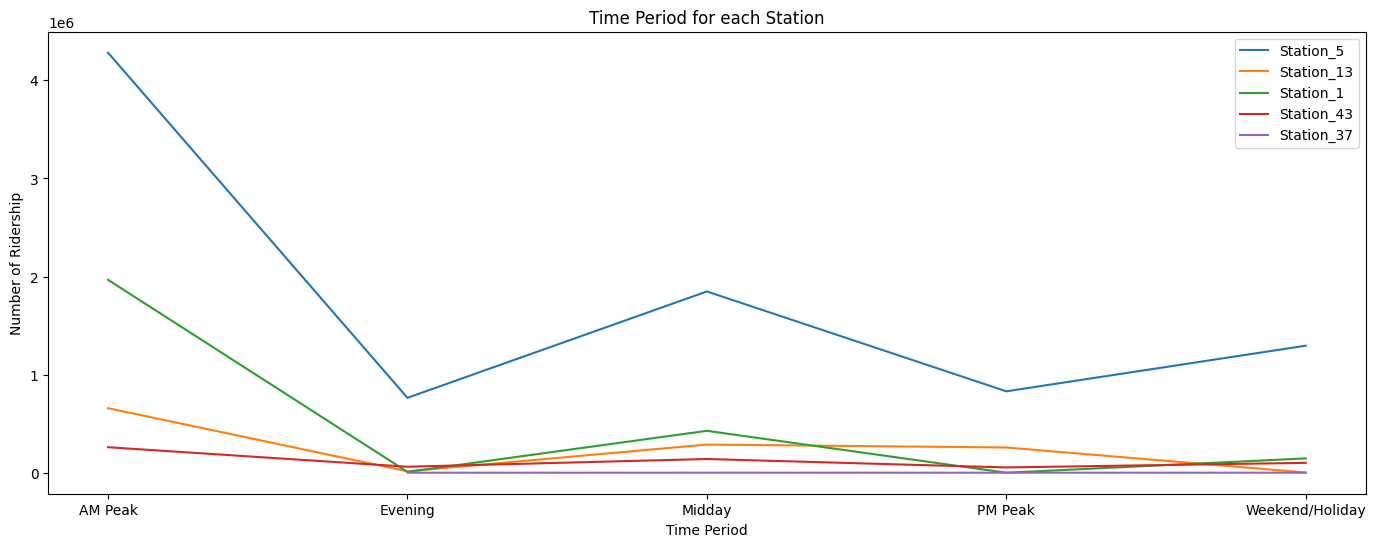

In [109]:
# Lets plot Ridership per Time Period for each Station

# Group by Station and Time Period and calculate the sum of ridership
grouped_station_time = df.groupby(['Station', 'Period']).sum().reset_index()

# Define the order of the Time Period categories
time_period_order = ['AM Peak', 'Midday', 'PM Peak', 'Evening', 'Weekend/Holiday']

# Convert 'Time Period' column to a categorical data type with the desired order
grouped_station_time['Period'] = pd.Categorical(grouped_station_time['Period'], categories=time_period_order, ordered=True)

# Create a list of stations for plotting
stations = grouped_station_time['Station'].sample(n=5, random_state=23).unique()

plt.figure(figsize=(17, 6))

# Plot each station with different symbology
for station in stations:
    station_data = grouped_station_time[grouped_station_time['Station'] == station]
    plt.plot(station_data['Period'], station_data['Ridership'], label=str(station))

plt.title('Time Period for each Station')
plt.xlabel('Time Period')
plt.ylabel('Number of Ridership')
plt.legend();

**The chart below suggests that there is a weekly cycle in passenger volume across the days of a month.**


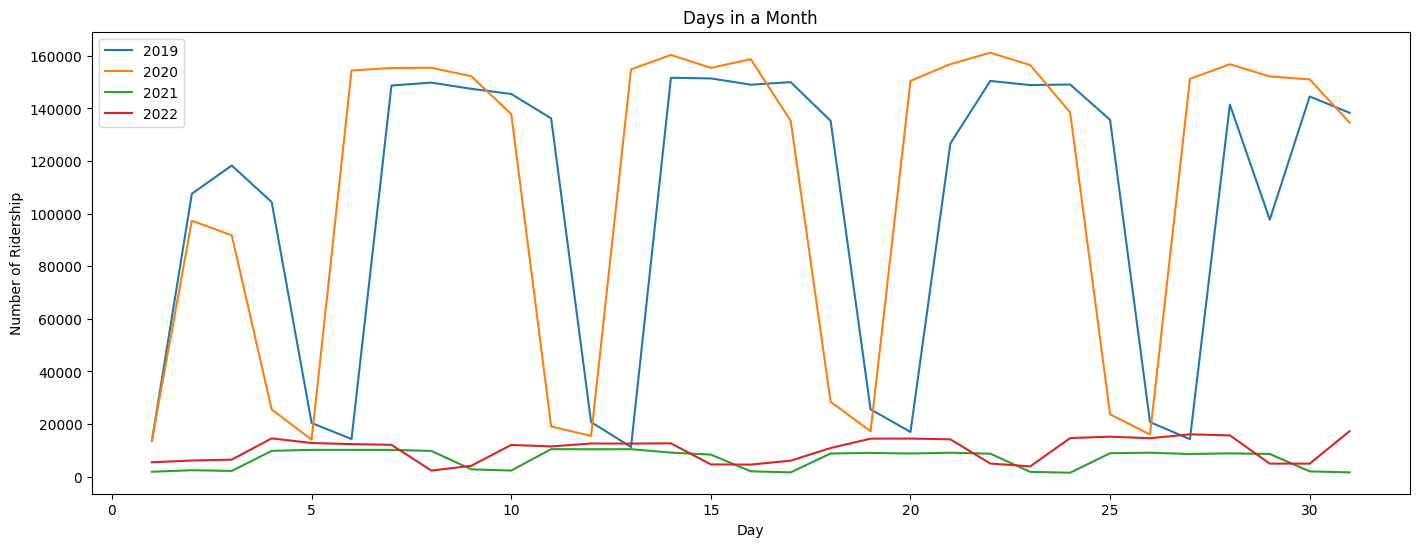

In [110]:
# Lets plot Ridership per Days in a Month say January

grouped_station_january = df[df['Month'] == 'January'].groupby(['Year', 'Day']).sum().reset_index()

# Create a list of year for plotting
stations = grouped_station_january['Year'].unique()
grouped_station_january = grouped_station_january.sort_values(by=['Day'])

plt.figure(figsize=(17, 6))

# Plot each year with different symbology
for station in stations:
    station_data = grouped_station_january[grouped_station_january['Year'] == station]
    plt.plot(station_data['Day'], station_data['Ridership'], label=str(station))

plt.title('Days in a Month')
plt.xlabel('Day')
plt.ylabel('Number of Ridership')
plt.legend();

**The chart below shows that, on average, metro usage is higher on holidays than on regular days. However, this could be due to data collection issues for holidays, as significantly fewer data points are recorded for holidays compared to regular days (the number of data points for regular days is 12 times higher than for holidays).**


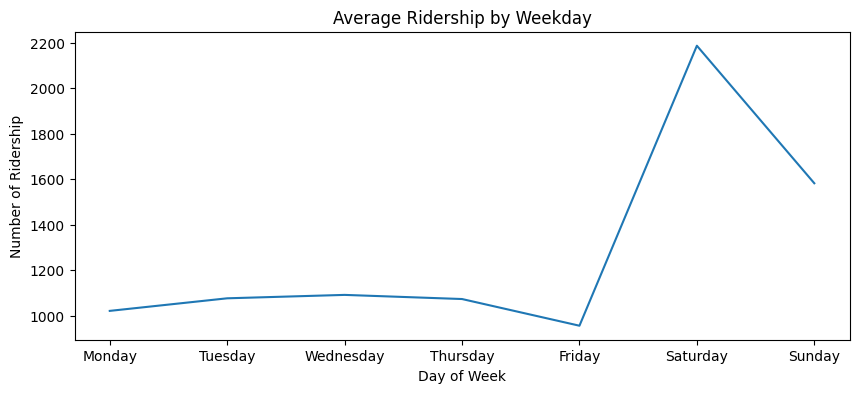

0  1        
0  Monday       11254
1  Tuesday      12411
2  Wednesday    12428
3  Thursday     12449
4  Friday       12228
5  Saturday      1819
6  Sunday        1780
dtype: int64

In [111]:
plt.figure(figsize=(10, 4))

df_wd = pd.concat([pd.to_datetime(df['Year'].astype(str) + '-' + df['Day'].astype(str) + '-' + df['Month'].astype(str)).dt.weekday,
                   pd.to_datetime(df['Year'].astype(str) + '-' + df['Day'].astype(str) + '-' + df['Month'].astype(str)).dt.day_name(),
                    df['Ridership']], axis=1)
grouped_weekday = df_wd.groupby([0, 1]).mean().reset_index().sort_values(by=[0])


plt.plot(grouped_weekday[1], grouped_weekday['Ridership'])
plt.title('Average Ridership by Weekday')
plt.xlabel('Day of Week')
plt.ylabel('Number of Ridership')
plt.show()

df_wd.groupby([0, 1]).size()

**From the three charts below showing the distribution of ridership, it is evident that three data points are significantly higher than the rest. To achieve a more appropriate distribution, these three points need to be removed from the dataset. Additionally, eight data points are much lower than these three removed points, but still significantly distant from the distribution of the other data. The ridership values for these eight data points will be adjusted to the maximum ridership value of the remaining data.**


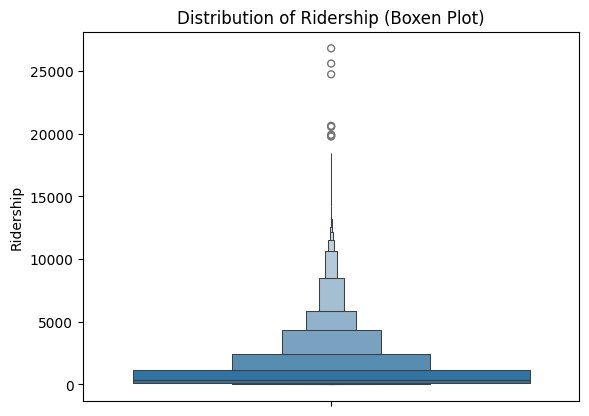

In [112]:
ax = sns.boxenplot(df["Ridership"])
plt.title('Distribution of Ridership (Boxen Plot)')
plt.show()

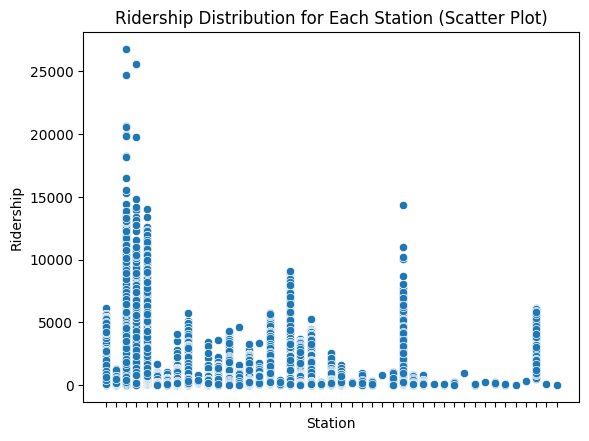

In [113]:
ax = sns.scatterplot(x=df["Station"], y=df["Ridership"])
ax.set_xticklabels([])
plt.title('Ridership Distribution for Each Station (Scatter Plot)')
plt.show()

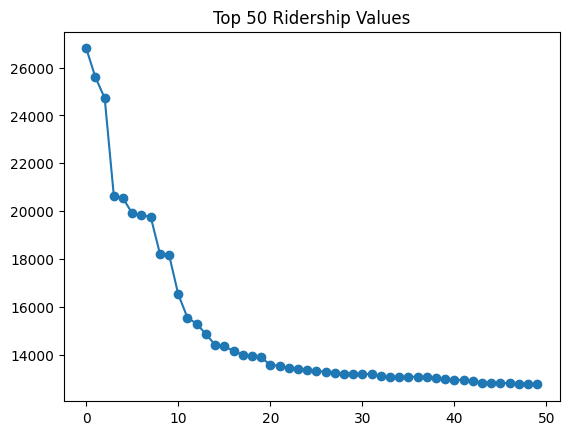

In [114]:
plt.plot(df["Ridership"].sort_values(ascending=False).head(50).reset_index(drop=True), marker='o')
plt.title('Top 50 Ridership Values')
plt.show()

In [115]:
df = df.drop(df["Ridership"].sort_values(ascending=False).head(3).index).reset_index(drop=True)

In [116]:
from scipy.stats.mstats import winsorize
winsorized_data = winsorize(df["Ridership"], limits=[0, 8/df["Ridership"].count()])

**The chart below shows that there are no further outlier data points, and the highest ridership value in the dataset is 15,544.**


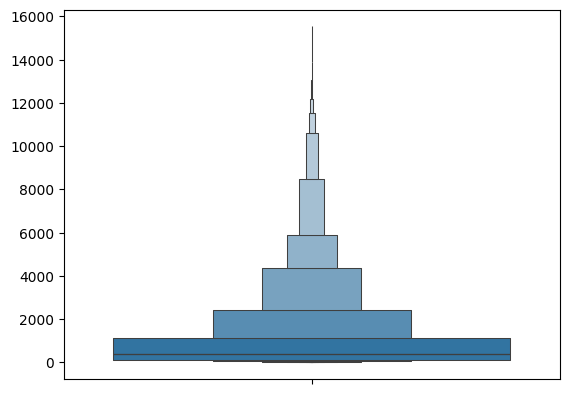

max ridership: 15544


In [117]:
ax = sns.boxenplot(winsorized_data)
plt.show()
print(f"max ridership: {winsorized_data.max()}")

In [118]:
df["Ridership"] = winsorized_data

**As shown in the two charts below, the distribution of ridership in its original form is not suitable and can lead to significant errors in models. However, the log-transformed distribution of the data approaches a normal distribution, which is highly desirable. Therefore, we apply the following transformation to the Ridership data:**

$$
\text{Ridership'} = \ln(\text{Ridership} + 1)
$$

**Where $ (\ln)$ represents the natural logarithm, and adding 1 ensures that zero values are handled appropriately.**


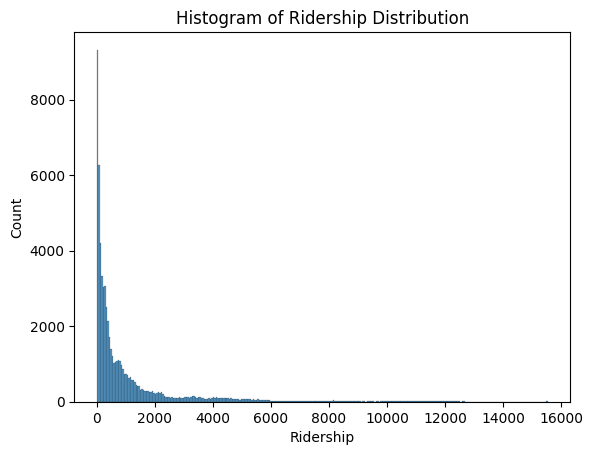

In [119]:
ax = sns.histplot(df["Ridership"])
plt.title('Histogram of Ridership Distribution')
plt.show()

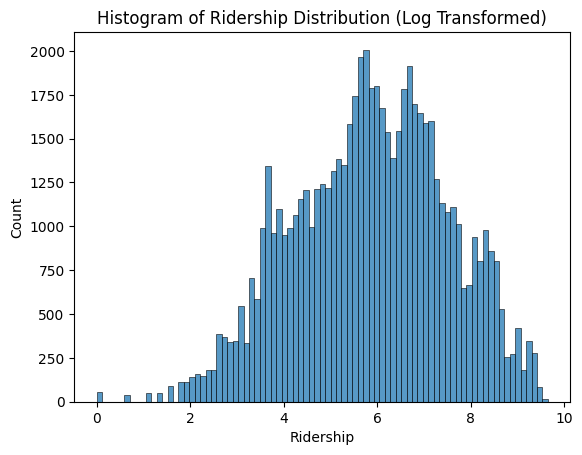

In [120]:
ax = sns.histplot(np.log(df["Ridership"]+1))
plt.title('Histogram of Ridership Distribution (Log Transformed)')
plt.show()

**Below is the distribution of other columns present in the dataset:**


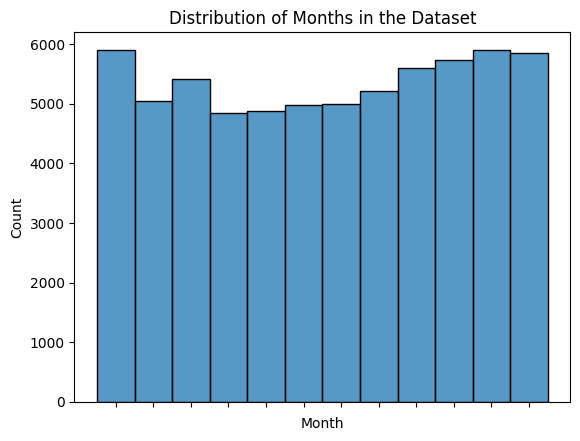

In [121]:
ax = sns.histplot(df["Month"])
ax.set_xticklabels([])
plt.title("Distribution of Months in the Dataset")
plt.show()

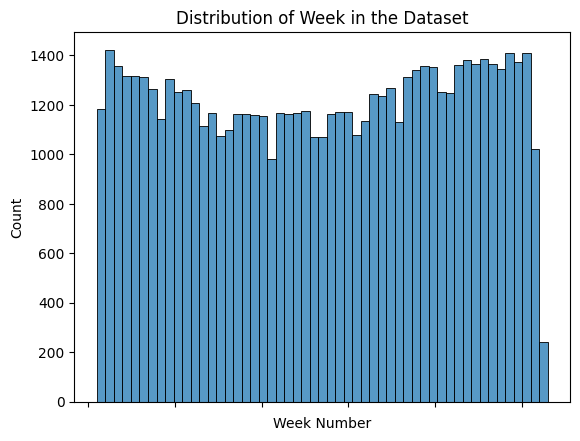

In [122]:
ax = sns.histplot(df["Week Number"], bins=df["Week Number"].nunique())
ax.set_xticklabels([])
plt.title("Distribution of Week in the Dataset")
plt.show()

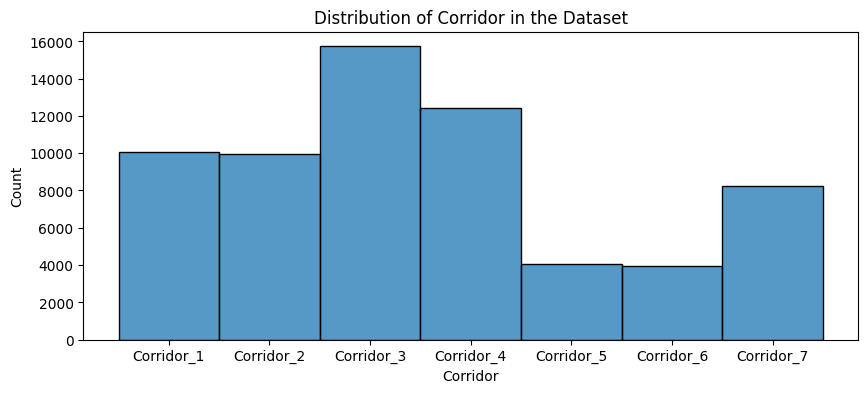

In [124]:
plt.figure(figsize=(10, 4))
ax = sns.histplot(df["Corridor"], bins=df["Corridor"].nunique())
plt.title("Distribution of Corridor in the Dataset")
plt.show()

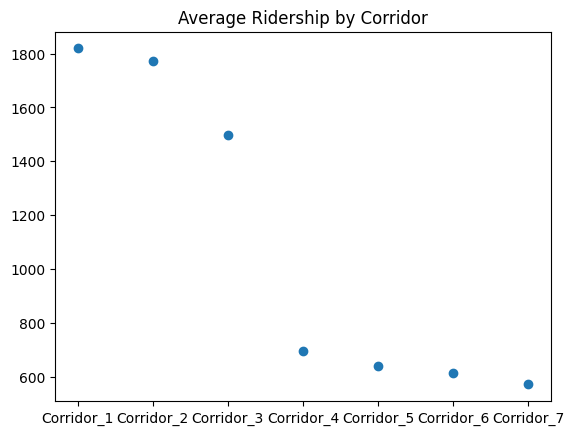

In [125]:
ax = plt.scatter(df["Corridor"].unique(), df.groupby("Corridor")["Ridership"].mean().sort_values(ascending=False))
plt.title("Average Ridership by Corridor")
plt.show()

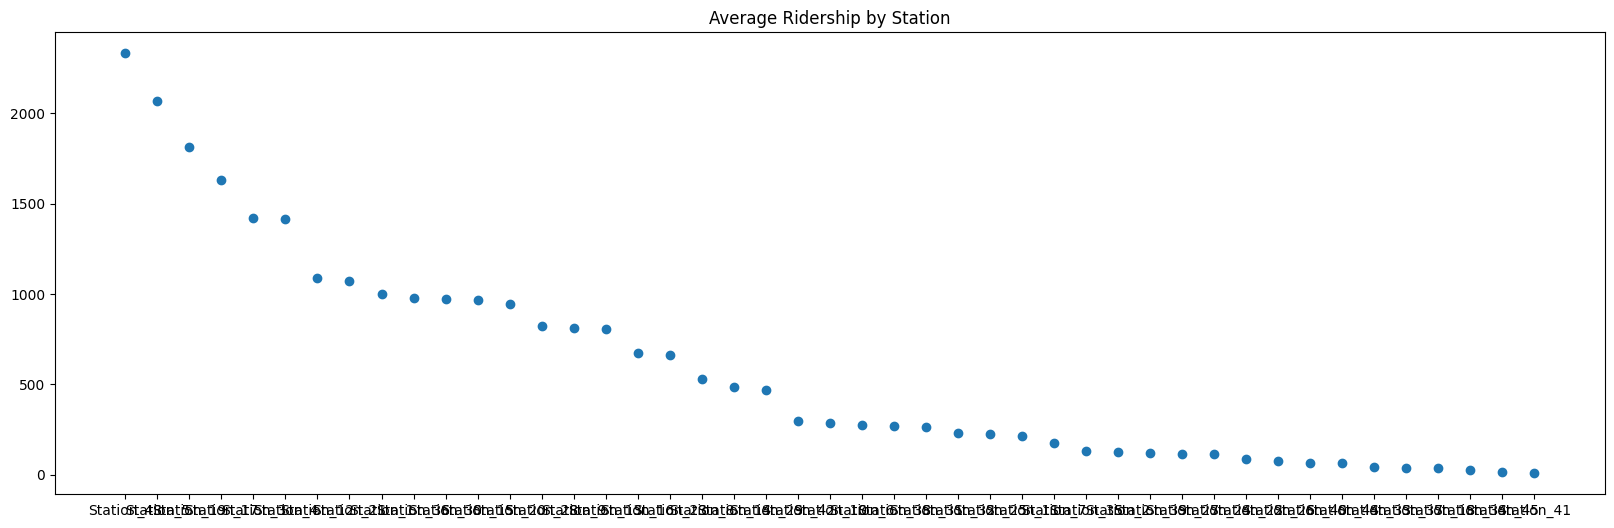

In [127]:
plt.figure(figsize=(20, 6))
station_ridership = df.groupby("Station")["Ridership"].mean().sort_values(ascending=False)
ax = plt.scatter(station_ridership.index, station_ridership)
plt.title("Average Ridership by Station")
plt.show()

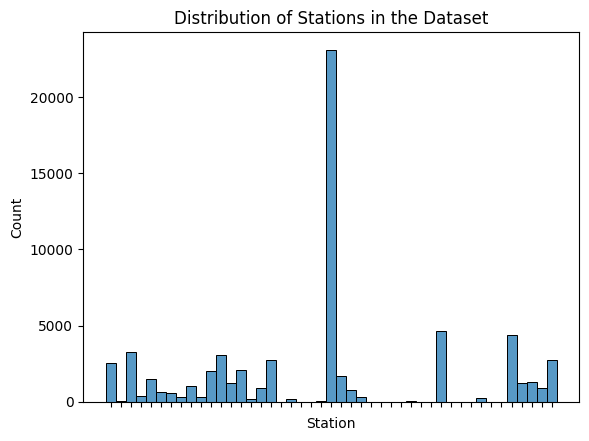

In [128]:
ax = sns.histplot(df["Station"].sort_values(), bins=df["Station"].nunique())
ax.set_xticklabels([])
plt.title("Distribution of Stations in the Dataset")
plt.show()

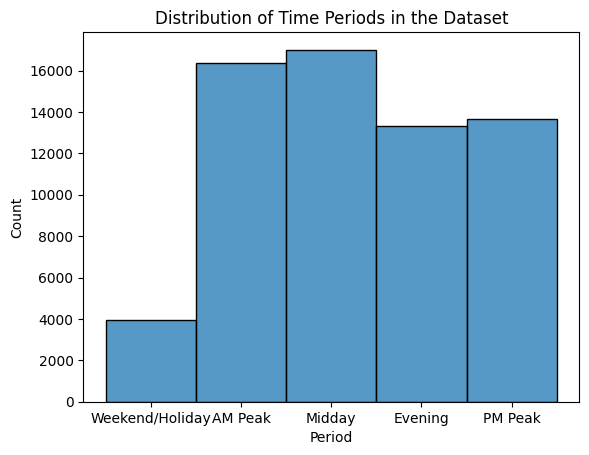

In [129]:
ax = sns.histplot(df["Period"], bins=df["Period"].nunique())
plt.title("Distribution of Time Periods in the Dataset")
plt.show()

# Feature Engineering

**The columns and features present in the current dataset are as follows:**
- 'Year'
- 'Month'
- 'Day'
- 'Week Number'
- 'Corridor'
- 'Workday'
- 'Station'
- 'Period'
- 'Ridership'
- 'N_trains'
- 'Covid19'


In [31]:
df.columns

Index(['Year', 'Month', 'Day', 'Week Number', 'Corridor', 'Workday', 'Station',
       'Period', 'Ridership', 'N_trains', 'Covid19'],
      dtype='object')

This snippet of code encodes the categorical features.

*   In order to keep the end of each month close to the first day of the next month, I moved the Day feature to a 2D space.
*   The same approach was tested for the Week feature, but it didn't turn out to work well.
*   The columns for the days of the week were added to the dataset to be considered as categorical features.
*   The Ridership values were transformed into their logarithmic values.


In [32]:
df['Month_Num'] = df['Month'].map(month_mapping)
df['Weekday_Number'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Day'].astype(str) + '-' + df['Month'].astype(str)).dt.weekday
df['Weekday_Name'] = pd.to_datetime(df['Year'].astype(str) + '-' + df['Day'].astype(str) + '-' + df['Month'].astype(str)).dt.day_name()
df['Ridership'] = np.log(df['Ridership']+1)

In [33]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

def encode_categorical_features(df):

    def convert_day_to_circle(day):
        angle = 2 * np.pi * (day - 1) / 31  # Calculate the angle based on the day
        x = np.cos(angle)  # Compute the x-coordinate on the unit circle
        y = np.sin(angle)  # Compute the y-coordinate on the unit circle
        return x, y

    def convert_week_to_circle(week):
        angle = 2 * np.pi * (week - 1) / 53  # Calculate the angle based on the week
        x = np.cos(angle)  # Compute the x-coordinate on the unit circle
        y = np.sin(angle)  # Compute the y-coordinate on the unit circle
        return x, y
    
    

    categorical_features = ['Month', 'Corridor', 'Station', 'Period', 'Weekday_Name']

    df['day_x'], df['day_y'] = zip(*df['Day'].map(convert_day_to_circle))
    X = df.drop(columns=['Ridership', 'Day'], axis=1)  # Features (excluding the target column) and also Day which is already converted
    y = df['Ridership']  # Target column

    # Create a ColumnTransformer to apply OneHotEncoder to categorical features
    preprocessor = ColumnTransformer(
    transformers=[
        ('onehot', OneHotEncoder(), categorical_features), 
        ('ordinal', OrdinalEncoder(categories=[['n', 'y']]), ['Workday'])  
    ],
    remainder='passthrough'
    )

    # Apply the ColumnTransformer to encode categorical features
    X_encoded = preprocessor.fit_transform(X)

    # Convert the encoded features to a dense matrix
    X_encoded = X_encoded.toarray()

    feature_names_out = list(preprocessor.get_feature_names_out())
    # Convert the dense matrix to a DataFrame
    X_encoded = pd.DataFrame(X_encoded, columns=[item.split('__')[1] for item in feature_names_out])

    return X_encoded

This code snippet creates a grid of scatter plots for each combination of variables in the df, allowing us to visualize the relationships between them.


*   Note 1: This only detects numerical columns.
*   Note 2: It can only find linear relationships.
*   Note 3: Since Onehot encoding will increase the number of features drastically we would not encode categorical features for the calcualtion of correlations


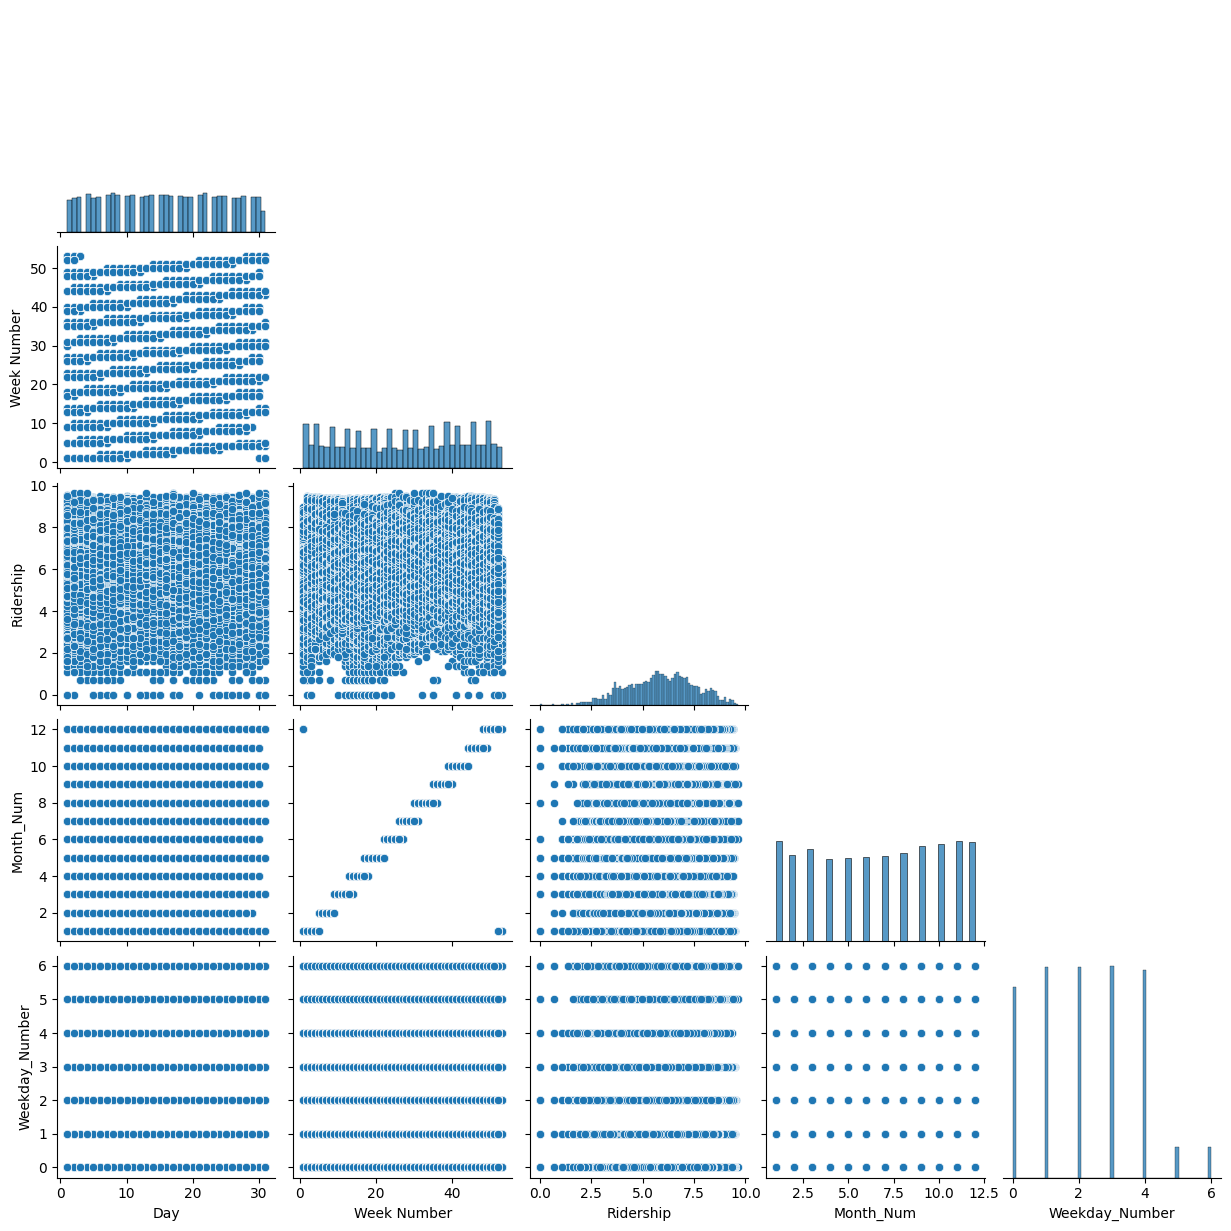

In [34]:
df_rel =df.drop(columns=['Year', 'Month', 'N_trains', 'Covid19', 'Corridor', 'Workday', 'Station', 'Period', 'Weekday_Name'])

import seaborn as sns
sns.pairplot(df_rel, corner=True)

This code snippet demonstrates how to create a heatmap of the correlation values between variables in a DataFrame using seaborn.
*   Note 1: This only detects numerical columns.
*   Note 2: It can only find linear relationships.

**Collinearity is obvious between Month_Num and Week Number. We can either remove one of these two.**


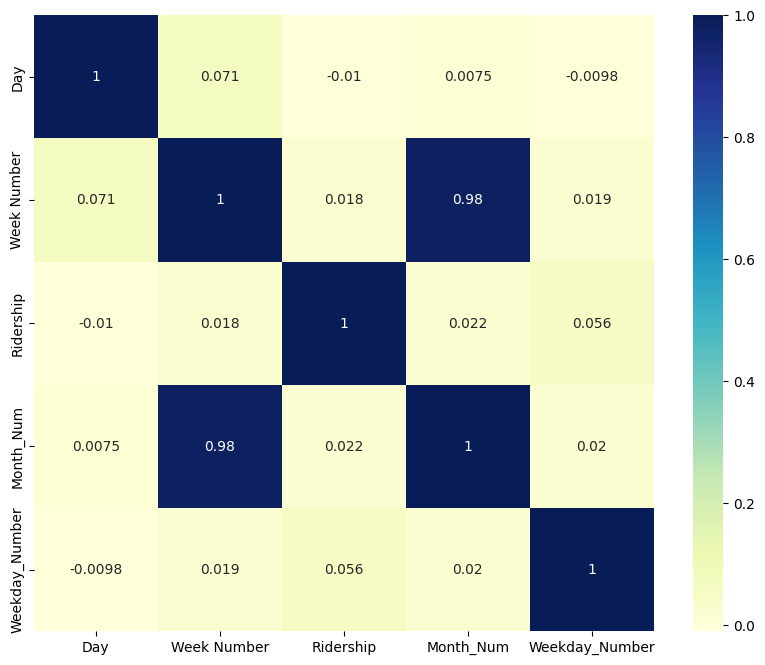

In [35]:
# Set the figure size
plt.figure(figsize=(10, 8))

# Create the heatmap with correlation values
sns.heatmap(df_rel.corr(), annot=True, cmap="YlGnBu");

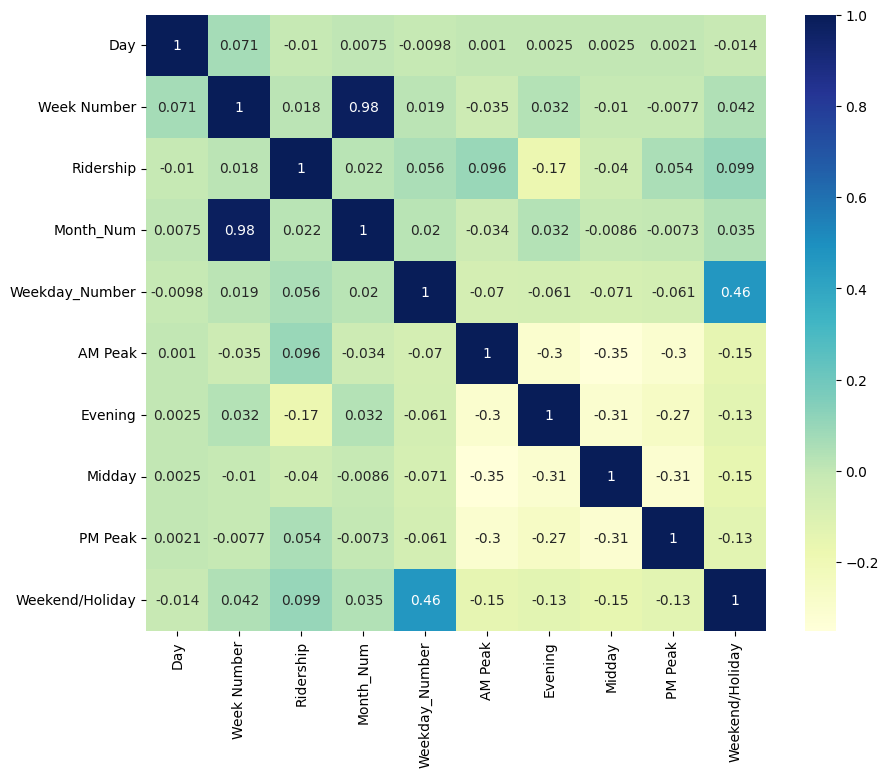

In [36]:
# Get the one-hot encoded representation of 'Time Period'
time_period_dummies = pd.get_dummies(df['Period'])
# Concatenate the dummy variables to the original dataframe
df_correlation = pd.concat([df_rel, time_period_dummies], axis=1)

plt.figure(figsize=(10, 8))
# Create the heatmap with correlation values
sns.heatmap(df_correlation.corr(), annot=True, cmap="YlGnBu");

Now Lets try to find the Mutual Information (MI) because the previous approaches only detect linear relationships.

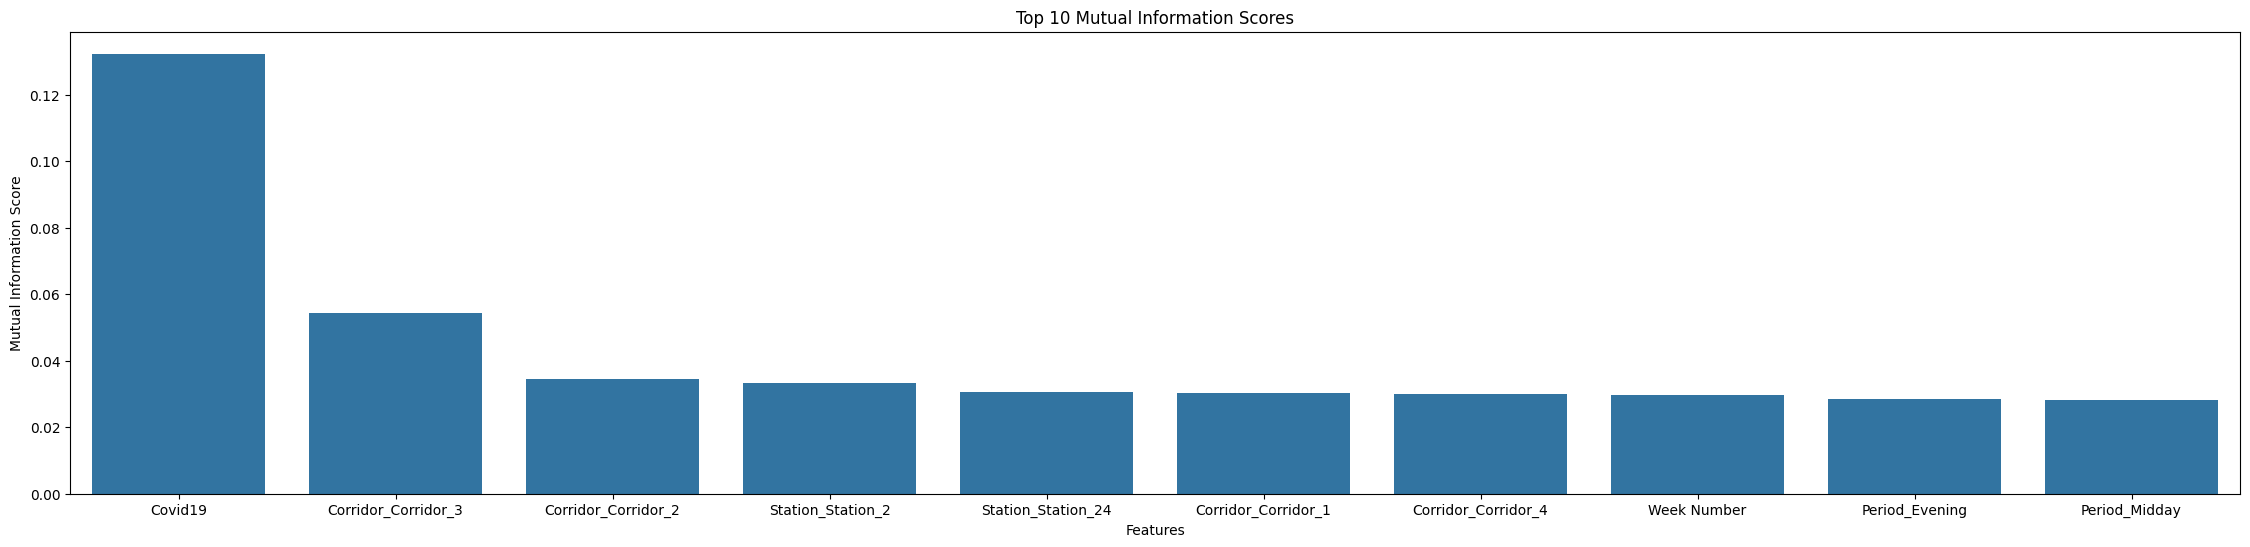

In [37]:
from sklearn.feature_selection import mutual_info_regression, mutual_info_classif

df = df.drop(columns=['Year', 'N_trains'])
x_mi = encode_categorical_features(df)
y_mi = df['Ridership']

def calculate_mutual_information(x_mi, y_mi):
    if isinstance(y_mi.iloc[0], str):  # Check if the target variable is categorical
        mi_scores = mutual_info_classif(x_mi, y_mi)
    else:
        mi_scores = mutual_info_regression(x_mi, y_mi)
    return mi_scores

# Assuming X is your feature matrix and y is your target column
mi_scores = calculate_mutual_information(x_mi, y_mi)
def plot_mutual_information(mi_scores, feature_names, top_n):
    sorted_indices = (-mi_scores).argsort()[:top_n]  # Get the indices of the top n scores
    top_mi_scores = mi_scores[sorted_indices]
    top_feature_names = feature_names[sorted_indices]

    plt.figure(figsize=(28, 6))
    sns.barplot(x=top_feature_names, y=top_mi_scores)
    plt.xlabel('Features')
    plt.ylabel('Mutual Information Score')
    plt.title('Top 10 Mutual Information Scores')
    plt.show()

# Assuming mi_scores contains the mutual information scores and feature_names contains the feature names
plot_mutual_information(mi_scores, x_mi.columns, top_n=10)

This snippet code finds degree of feature importance by using a random forest regressor. Two plots are visualized that are related to before and after encoding.

Before encoding:

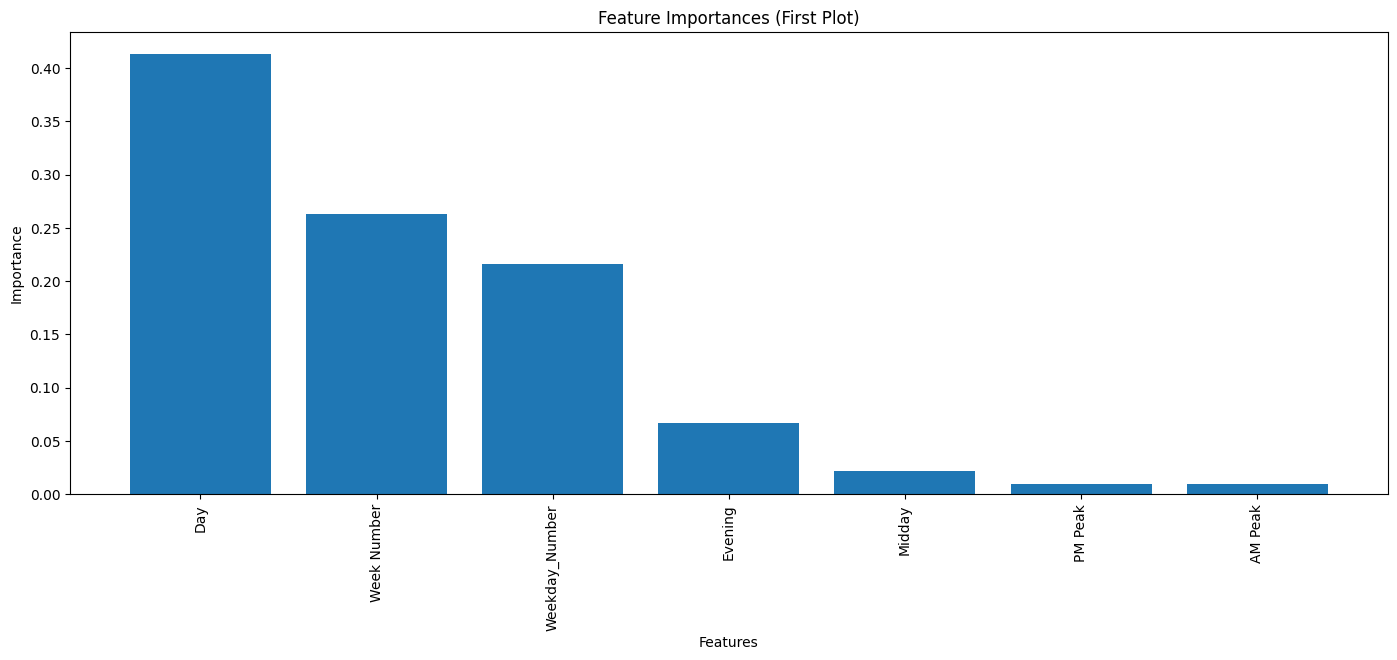

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Create a random forest regressor
rf = RandomForestRegressor()

time_period_dummies = pd.get_dummies(df['Period'])
# Concatenate the dummy variables to the original dataframe
df_importance = pd.concat([df, time_period_dummies], axis=1)


# Select the features and target for the first plot
features_1 = df_importance[['Day', 'Week Number', 'AM Peak', 'Evening', 'Midday', 'PM Peak', 'Weekday_Number']]
target_1 = df_importance['Ridership']
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(features_1, target_1, test_size=0.2, random_state=42)

# Fit the model to the first data
rf.fit(X_train_1, y_train_1)

# Get feature importances for the first plot
importances_1 = rf.feature_importances_

# Create a DataFrame with feature names and importances for the first plot
feature_importances_1 = pd.DataFrame({'Feature': features_1.columns, 'Importance': importances_1})

# Sort the features by importance in descending order for the first plot
feature_importances_1 = feature_importances_1.sort_values(by='Importance', ascending=False)


fig, ax = plt.subplots(figsize=(17, 6))

# Plot the feature importances for the first plot
ax.bar(feature_importances_1['Feature'], feature_importances_1['Importance'])
ax.set_xticks(range(len(feature_importances_1['Feature'])))
ax.set_xticklabels(feature_importances_1['Feature'], rotation=90)
ax.set_title('Feature Importances (First Plot)')
ax.set_xlabel('Features')
ax.set_ylabel('Importance');

After encoding:

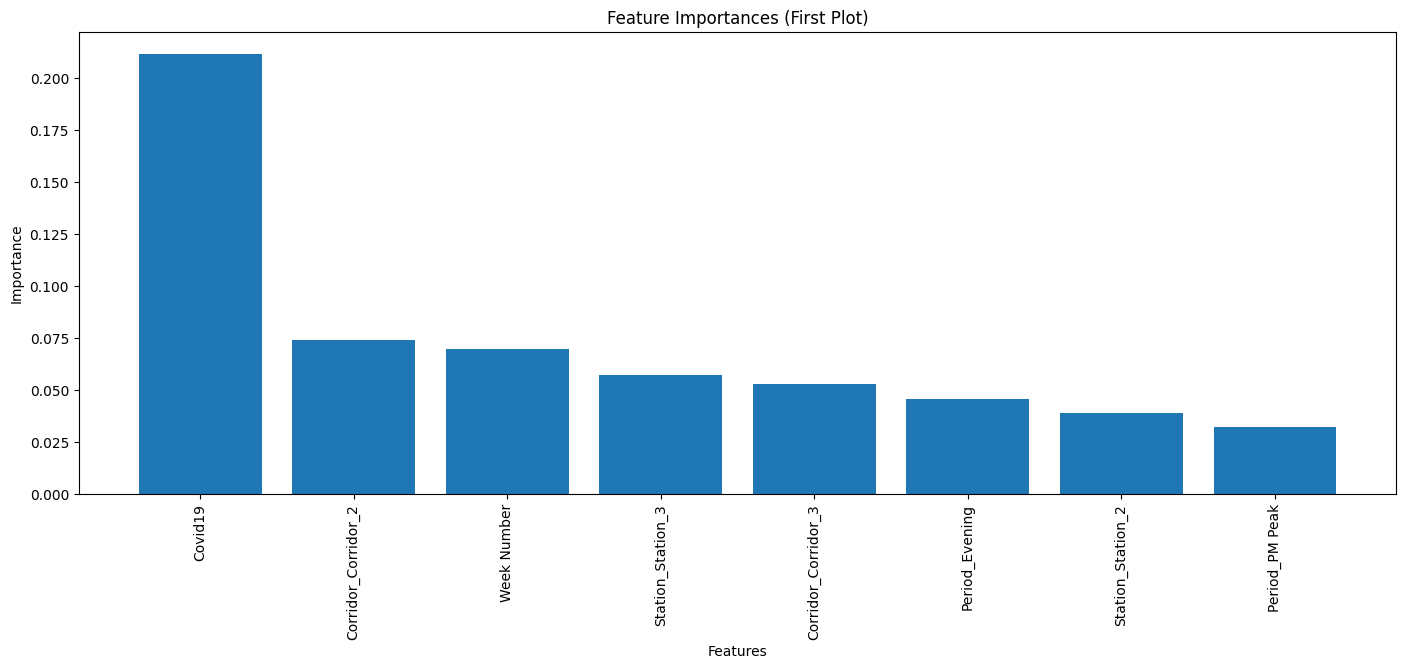

In [39]:
X_encoded = encode_categorical_features(df)
# Select the features and target for the second plot
features_2 = X_encoded
target_2 = df['Ridership']
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(features_2, target_2, test_size=0.2, random_state=42)

# Fit the model to the second data
rf.fit(X_train_2, y_train_2)

# Get feature importances for the second plot
importances_2 = rf.feature_importances_

# Create a DataFrame with feature names and importances for the second plot
feature_importances_2 = pd.DataFrame({'Feature': features_2.columns, 'Importance': importances_2})

# Sort the features by importance in descending order for the second plot
feature_importances_2 = feature_importances_2.sort_values(by='Importance', ascending=False)

# Select the top 10 important features for the second plot
top_features_2 = feature_importances_2.head(8)

fig, ax = plt.subplots(figsize=(17, 6))

# Plot the feature importances for the first plot
ax.bar(top_features_2['Feature'], top_features_2['Importance'])
ax.set_xticks(range(len(top_features_2['Feature'])))
ax.set_xticklabels(top_features_2['Feature'], rotation=90)
ax.set_title('Feature Importances (First Plot)')
ax.set_xlabel('Features')
ax.set_ylabel('Importance');

# Data Prepration for model training

Since we are working with time series data, in order for our evaluation to be fair, 15% of the data is allocated for testing, 15% of the remaining 85% is used for model validation, and the remaining 85% is used for model training.

In [40]:
# Since we're trying to predict the ridership for different stations we have to apply the 80% to each of the stations separately

def split_the_timeseries_data(df, X_encoded):
    # Create empty lists to store the train-test split data
    X_train = []
    X_val = []
    X_test = []
    y_train = []
    y_val = []
    y_test = []


    # Iterate over each unique station
    for station in df['Station'].unique():
        # Get the data for the current station
        station_data = X_encoded[X_encoded['Station_'+station] == 1]
        target_data = df.loc[X_encoded['Station_'+station] == 1, 'Ridership']

        # Determine the number of samples to include in the test set
        test_size = int(len(station_data) * 0.15)

        # Split the data into trainval and test sets
        station_X_trainval = station_data[:-test_size]
        station_X_test = station_data[-test_size:]
        station_y_trainval = target_data[:-test_size]
        station_y_test = target_data[-test_size:]

        # Determine the number of samples to include in the val set
        val_size = int(len(station_X_trainval) * 0.15)

        # Split the data into train and val sets
        station_X_train = station_X_trainval[:-val_size]
        station_X_val = station_X_trainval[-val_size:]
        station_y_train = station_y_trainval[:-val_size]
        station_y_val = station_y_trainval[-val_size:]

        # Append the station-specific data to the overall train-test split
        X_train.append(station_X_train)
        X_val.append(station_X_val)
        X_test.append(station_X_test)
        y_train.append(station_y_train)
        y_val.append(station_y_val)
        y_test.append(station_y_test)

    # Concatenate the train-test split data
    X_train = pd.concat(X_train)
    X_val = pd.concat(X_val)
    X_test = pd.concat(X_test)
    y_train = pd.concat(y_train)
    y_val = pd.concat(y_val)
    y_test = pd.concat(y_test)

    return X_train, X_val ,X_test, y_train, y_val, y_test

In [41]:
X_encoded = encode_categorical_features(df)
X_train, X_val ,X_test, y_train, y_val, y_test = split_the_timeseries_data(df, X_encoded)

In [42]:
print("Train shape:", X_train.shape)
print("val  shape:", X_val.shape)
print("Test  shape:", X_test.shape)

X_test.groupby('Month_Num').size()

Train shape: (46516, 83)
val  shape: (8192, 83)
Test  shape: (9658, 83)


Month_Num
1.0      137
2.0      118
3.0      201
4.0      152
5.0      412
6.0      941
7.0     1024
8.0     1255
9.0     1190
10.0    1211
11.0    1434
12.0    1583
dtype: int64

In [43]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train = pd.DataFrame(scaler.fit_transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_test.columns)
X_val = pd.DataFrame(scaler.transform(X_val), columns=X_val.columns)

In [44]:
X_train.columns

Index(['Month_April', 'Month_August', 'Month_December', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September',
       'Corridor_Corridor_1', 'Corridor_Corridor_2', 'Corridor_Corridor_3',
       'Corridor_Corridor_4', 'Corridor_Corridor_5', 'Corridor_Corridor_6',
       'Corridor_Corridor_7', 'Station_Station_1', 'Station_Station_10',
       'Station_Station_11', 'Station_Station_12', 'Station_Station_13',
       'Station_Station_14', 'Station_Station_15', 'Station_Station_16',
       'Station_Station_17', 'Station_Station_18', 'Station_Station_19',
       'Station_Station_2', 'Station_Station_20', 'Station_Station_21',
       'Station_Station_22', 'Station_Station_23', 'Station_Station_24',
       'Station_Station_25', 'Station_Station_26', 'Station_Station_27',
       'Station_Station_28', 'Station_Station_29', 'Station_Station_3',
       'Station_Station_30', 'Station_Station_31', 

Three columns have been removed from the final dataset:
1. Month_Num: due to its identical performance with Week Number.
2. Weekday_Number: due to its identical performance with Week Number.
3. Workday: due to its identical content with the Period_Weekend/Holiday column.


In [45]:
X_train = X_train.drop(columns=['Month_Num', 'Weekday_Number', 'Workday'], axis=1)

X_test = X_test.drop(columns=['Month_Num', 'Weekday_Number', 'Workday'], axis=1)

X_val = X_val.drop(columns=['Month_Num', 'Weekday_Number', 'Workday'], axis=1)

In [46]:
X_train.columns

Index(['Month_April', 'Month_August', 'Month_December', 'Month_February',
       'Month_January', 'Month_July', 'Month_June', 'Month_March', 'Month_May',
       'Month_November', 'Month_October', 'Month_September',
       'Corridor_Corridor_1', 'Corridor_Corridor_2', 'Corridor_Corridor_3',
       'Corridor_Corridor_4', 'Corridor_Corridor_5', 'Corridor_Corridor_6',
       'Corridor_Corridor_7', 'Station_Station_1', 'Station_Station_10',
       'Station_Station_11', 'Station_Station_12', 'Station_Station_13',
       'Station_Station_14', 'Station_Station_15', 'Station_Station_16',
       'Station_Station_17', 'Station_Station_18', 'Station_Station_19',
       'Station_Station_2', 'Station_Station_20', 'Station_Station_21',
       'Station_Station_22', 'Station_Station_23', 'Station_Station_24',
       'Station_Station_25', 'Station_Station_26', 'Station_Station_27',
       'Station_Station_28', 'Station_Station_29', 'Station_Station_3',
       'Station_Station_30', 'Station_Station_31', 

In [47]:
X_train.to_csv("data\Q1\X_train.csv", index=False)
X_test.to_csv("data\Q1\X_test.csv", index=False)
X_val.to_csv("data\Q1\X_val.csv", index=False)
y_train.to_csv("data\Q1\y_train.csv", index=False)
y_test.to_csv("data\Q1\y_test.csv", index=False)
y_val.to_csv("data\Q1\y_val.csv", index=False)

In [130]:
!pip freeze > requirements.txt
